# <font color=blue>Assignments for "Visualization with Seaborn"</font>

In this assignment you will continue to make some plots on the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). For plotting you will use Seaborn library. 

1. Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

axis_style={'family': 'Arial', 'color': 'darkblue', 'size': 18 }
title_style={'family': 'Arial', 'color': 'darkred', 'size': 20 }

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=["date"], low_memory=False)
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
35288,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35289,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35290,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35291,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35292,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


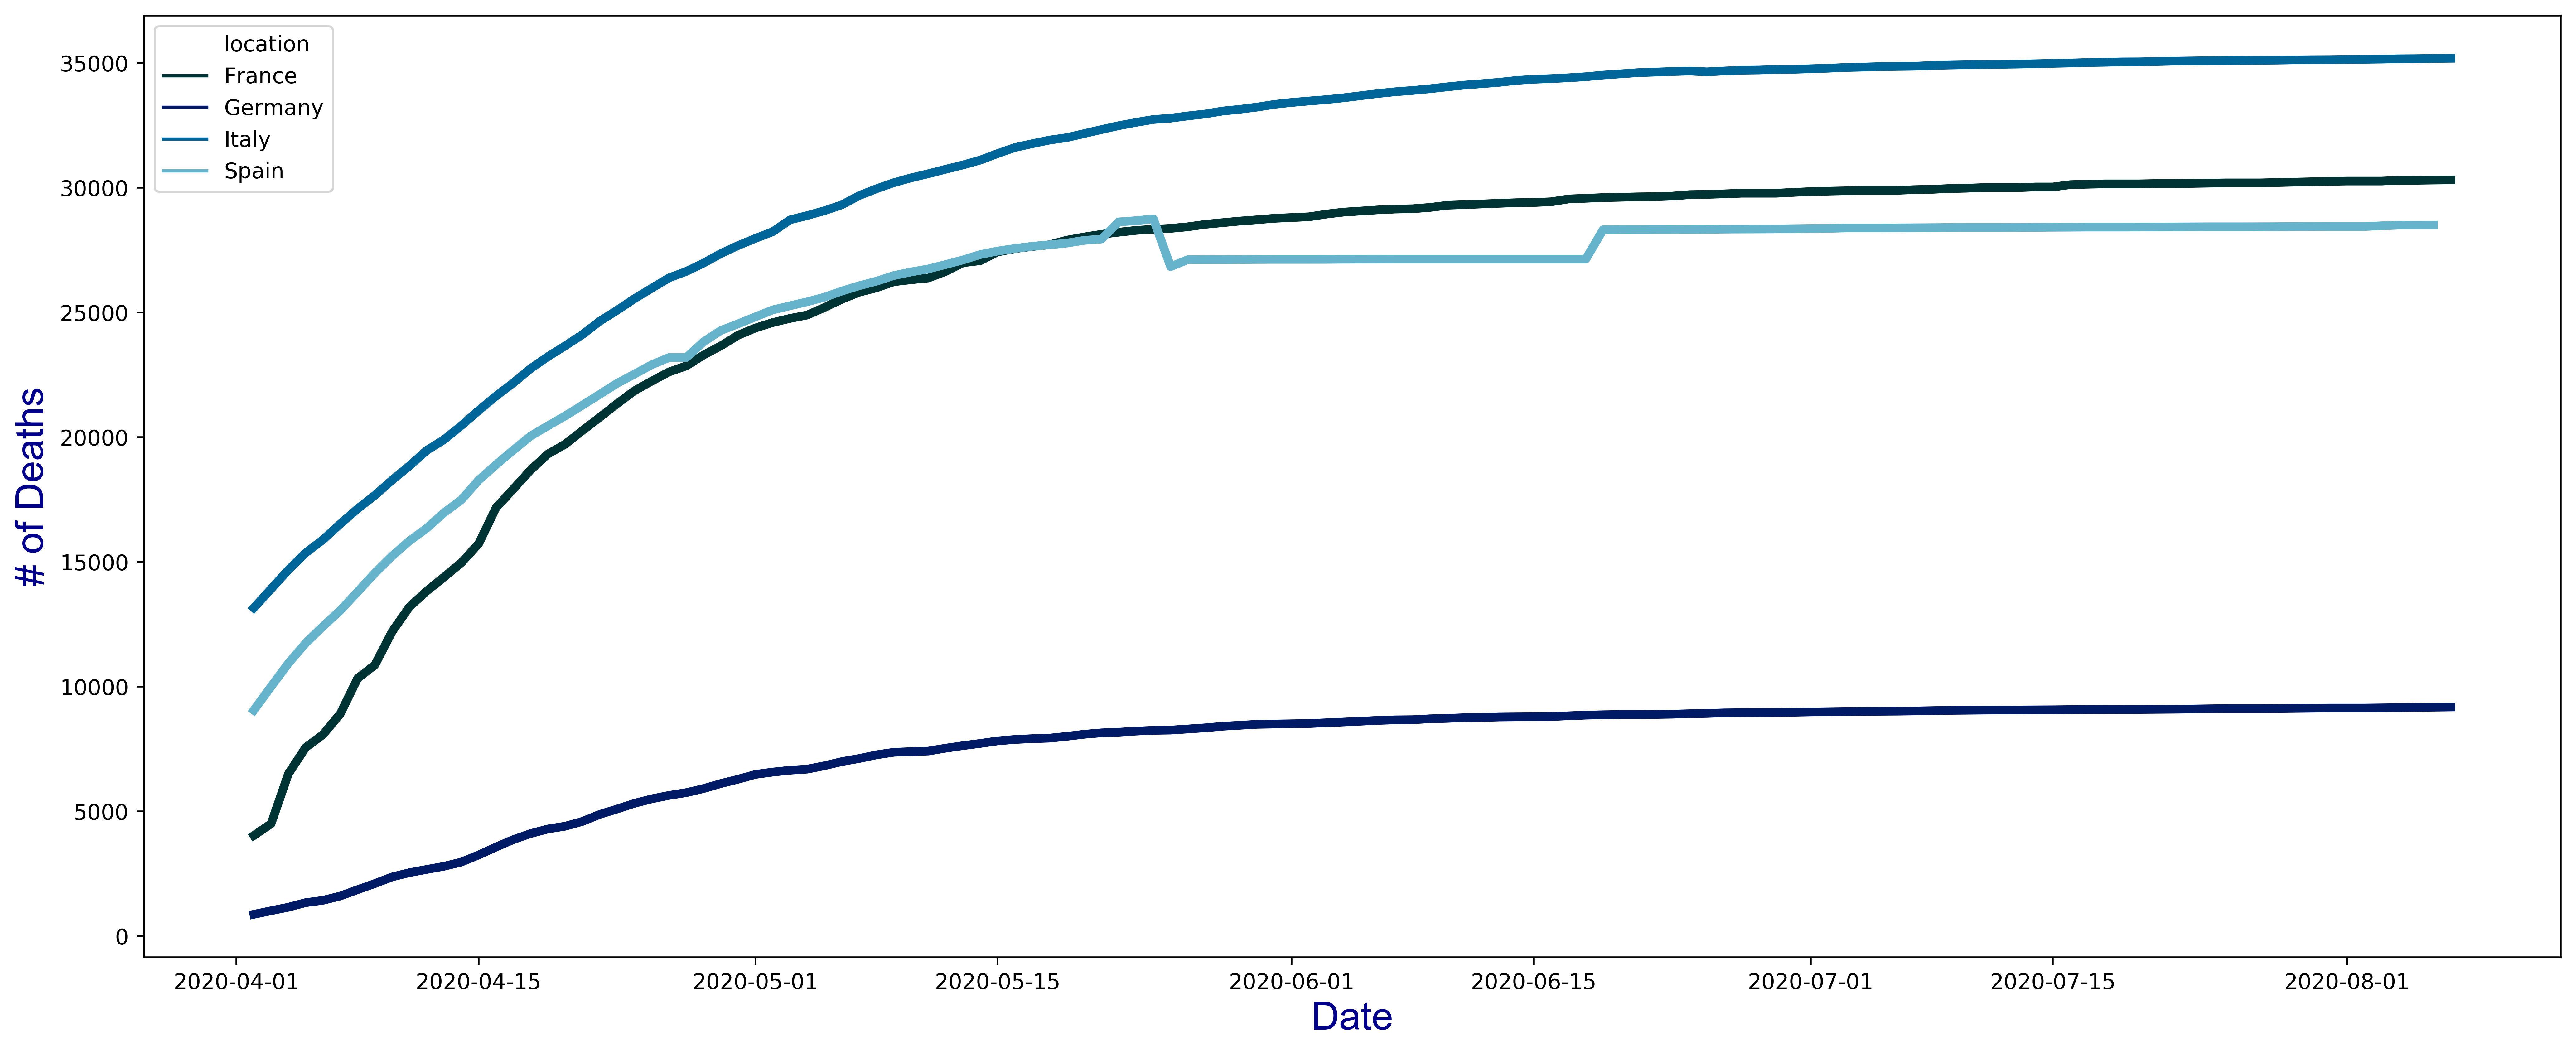

In [212]:
x=df[df['date']>'2020-04-01']
z=x[x['location'].isin(['Germany','France','Italy','Spain'])]

plt.figure(figsize=(20,8), dpi=500)
sns.lineplot(x['date'],x['total_deaths'],data=x,hue=z.location,palette='ocean',lw=4)
plt.xlabel('Date', fontdict=axis_style)
plt.ylabel('# of Deaths', fontdict=axis_style)
plt.show()

2. Plot a bar plot with seaborn for average death number that compares continents.

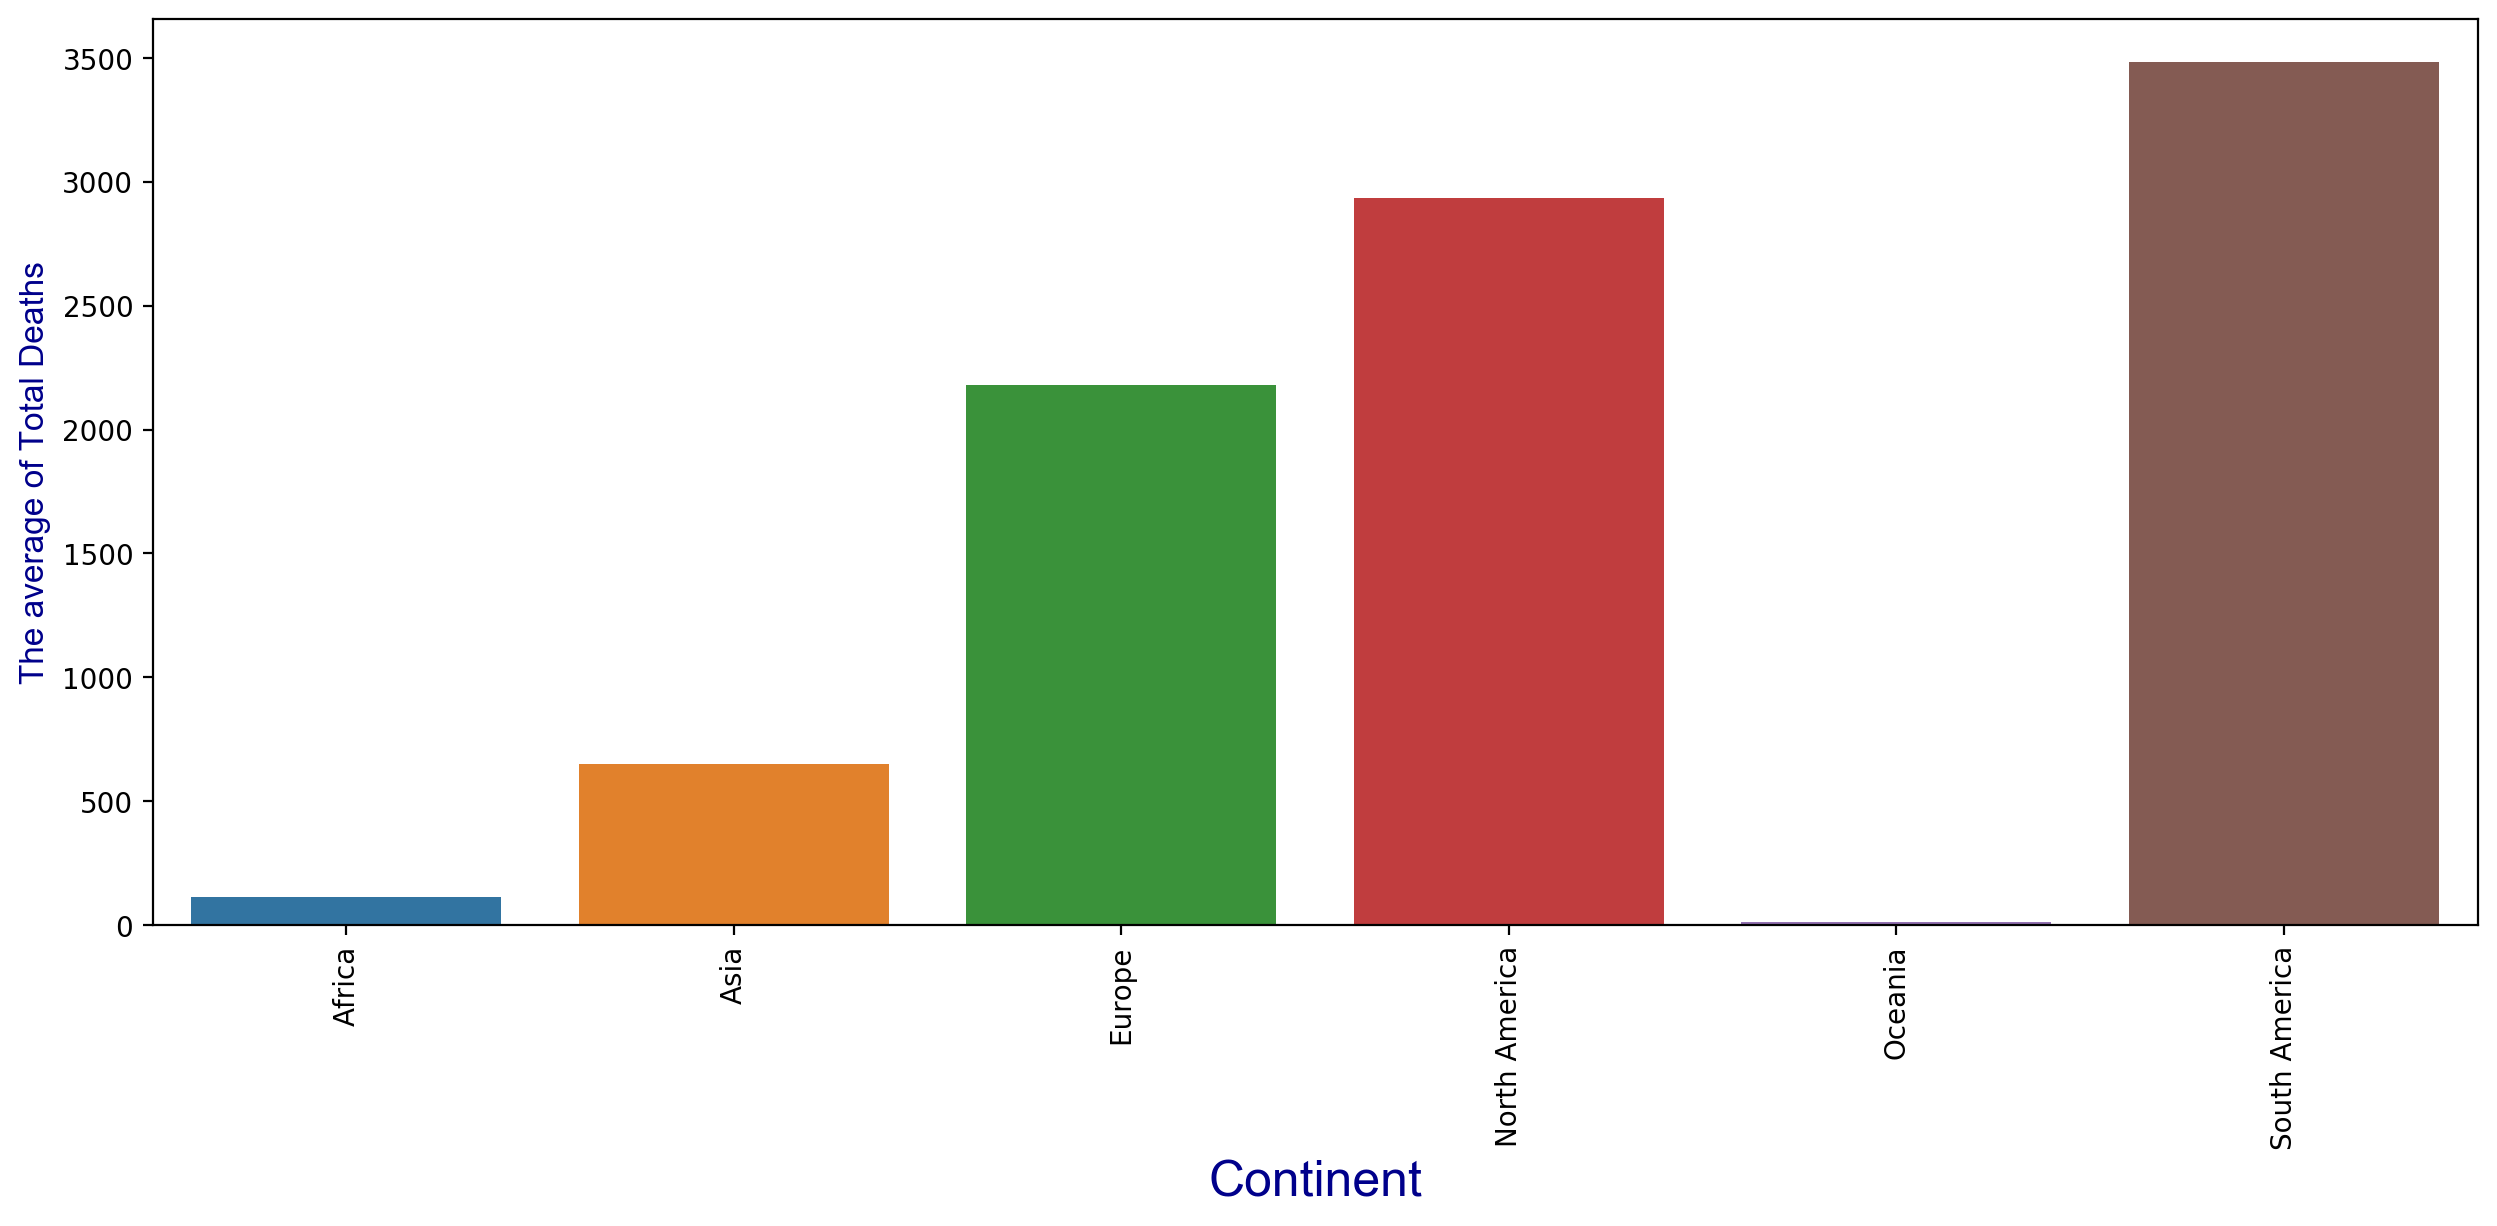

In [214]:

y=df.groupby(by='continent')['total_deaths'].mean()
x=y.index
plt.figure(figsize=(15,6), dpi=200)
sns.barplot(x,y)
plt.xlabel('Continent', fontdict=axis_style)
plt.ylabel('The average of Total Deaths', fontdict=axis_style, size=12)
plt.xticks(rotation=90)
plt.show()

3. Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and `kde` arguments.

In [ ]:

df_hist_data= df[df['location']=='Spain']['new_deaths']
#df.iloc[10162]
del df_hist_data[10162]
df_hist_data.max()
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.distplot(df_hist_data, bins=50,kde=True)

plt.subplot(2,2,2)
sns.distplot(df_hist_data, bins=50,kde=False)

plt.subplot(2,2,3)
sns.distplot(df_hist_data, bins=25,kde=True)

plt.subplot(2,2,4)
sns.distplot(df_hist_data, bins=25,kde=False)
plt.show()

4. Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose.

In [ ]:
df_france= df[df['location'].isin(['Germany','France'])]
#df_france[df_france['location']=='France']
#df_germany= df[df['location']=='Germany']['new_deaths']
#df_germany
#
plt.figure(figsize=(10, 4), dpi = 500)
plt.subplot(1,3,1)
sns.swarmplot(x=df_france['location'],y=df_france['new_deaths'], data=df_france)


plt.subplot(1,3,2)
sns.boxplot(x=df_france['location'], y=df_france['new_deaths'], data=df_france)

plt.subplot(1,3,3)
sns.violinplot(x=df_france['location'], y=df_france['new_deaths'], data=df_france)

plt.show()

